# Twitter Disaster Classification: Natural Language Processing

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#Importing data
df = pd.read_csv('data/train.csv')

In [4]:
# Feature Selection
X = df['text']
y = df['target']

#vectorizer = CountVectorizer(ngram_range=(2,2))
#X = vectorizer.fit_transform(X)
#X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [5]:
# Let's split the data for training, cross-validation, and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 72);
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 72);

In [7]:
# Plotting:
acc = []
pre = []
rec=[]
fs=[]
def evaluation(y_val, predictions):
    """ Prints out evaluation information.
    
        y_val: true value of the targets
        predictions: predicted value of the targets"""
    # Let's look at the evaluation metrics:
    ## 1. Accuracy
    accuracy = accuracy_score(y_val, predictions)
    acc.append(accuracy)
    
    ## 2. Precision
    precision = precision_score(y_val, predictions)
    pre.append(precision)
    
    ## 3. Recall
    recall = recall_score(y_val, predictions)
    rec.append(recall)
    
    ## 4. F1 score
    f1 = f1_score(y_val, predictions)
    fs.append(f1)
    print("Accuracy: ",accuracy, "\nPrecision:", 
          precision, "\nRecall:   ",recall, "\nF1:       ",f1)
    return f1

In [8]:
# Algorithm 1: Naive Bayes

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
vectorizer = CountVectorizer(ngram_range=(1,2))

# Make a pipeline
stepsNB = [("count", vectorizer),("classifier", classifier)]
pipeNB = Pipeline(steps = stepsNB)

# Fit the pipe:
pipeNB.fit(X_train, y_train)
predictionsNB = pipeNB.predict(X_val)

# Evaluation
evaluation(y_val, predictionsNB)

Accuracy:  0.7996715927750411 
Precision: 0.8171806167400881 
Recall:    0.6973684210526315 
F1:        0.7525354969574035


0.7525354969574035

In [8]:
# Algorithm 2: AdaBoost
from sklearn.ensemble import AdaBoostClassifier
modelAB = AdaBoostClassifier(n_estimators = 150, random_state = 1)
stepsAB = [("count", vectorizer),("adaboost", modelAB)]
pipeAB = Pipeline(steps = stepsAB)
pipeAB.fit(X_train, y_train)
predictionsAB = pipeAB.predict(X_val)
evaluation(y_val, predictionsAB)

Accuracy:  0.7750410509031199 
Precision: 0.776824034334764 
Recall:    0.6804511278195489 
F1:        0.7254509018036073


0.7254509018036073

In [9]:
# Algorithm 3: Logistic Regression
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state = 1, max_iter = 100000)
stepsLR = [("counts",vectorizer), ("LR", modelLR)]
pipeLR = Pipeline(steps = stepsLR)
pipeLR.fit(X_train, y_train)
predictionsLR = pipeLR.predict(X_val)
evaluation(y_val, predictionsLR)

Accuracy:  0.7947454844006568 
Precision: 0.827906976744186 
Recall:    0.6691729323308271 
F1:        0.74012474012474


0.74012474012474

In [10]:
# Algorithm 4: Support Vector Classifier
from sklearn.svm import SVC
modelSVC = SVC(C = 2, degree = 1)
stepsSVC = [("counts",vectorizer), ("SVC", modelSVC)]
pipeSVC = Pipeline(steps = stepsSVC)
pipeSVC.fit(X_train, y_train)
predictionsSVC = pipeSVC.predict(X_val)
evaluation(y_val, predictionsSVC)

Accuracy:  0.7848932676518884 
Precision: 0.8609625668449198 
Recall:    0.6052631578947368 
F1:        0.7108167770419427


0.7108167770419427

In [11]:
# Algorithm 5: XGBoost
from xgboost import XGBClassifier
modelXGB = XGBClassifier(max_depth = 100, learning_rate = .1)
stepsXGB = [("counts",vectorizer), ("XGB", modelXGB)]
pipeXGB = Pipeline(steps = stepsXGB)
pipeXGB.fit(X_train, y_train)
predictionsXGB = pipeXGB.predict(X_val)
evaluation(y_val, predictionsXGB)

Accuracy:  0.7635467980295566 
Precision: 0.7811059907834101 
Recall:    0.6372180451127819 
F1:        0.7018633540372671


0.7018633540372671

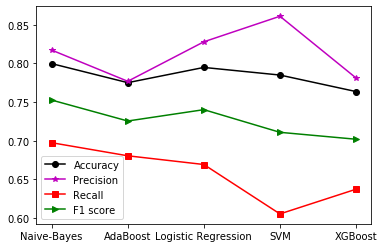

In [65]:
#Plot 1

fig = plt.figure();
plt.plot([0, 10, 20, 30, 40],acc,'ko-')
plt.xticks([0, 10, 20, 30, 40], ["Naive-Bayes", "AdaBoost",
                                 "Logistic Regression", "SVM", "XGBoost"])
plt.plot([0, 10, 20, 30, 40],pre,'m*-')
plt.plot([0, 10, 20, 30, 40],rec,'rs-')
plt.plot([0, 10, 20, 30, 40],fs, 'g>-')
plt.legend(["Accuracy","Precision","Recall","F1 score"])
plt.savefig(fname = "comparison.png")

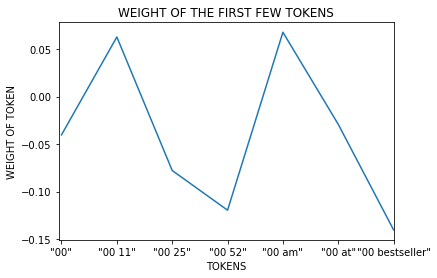

In [63]:
#Plot 2

# We can take a look at the importance of tokens with 
# the help of Logistic Regression Model
coeffs = modelLR.coef_
df = pd.read_csv('data/train.csv')
X = df['text']
y = df['target']
vectorizer = CountVectorizer(ngram_range=(1,2))
Xa = vectorizer.fit_transform(X)
X = pd.DataFrame(Xa.toarray(), columns=vectorizer.get_feature_names())
# Since this is a very high dimensional space, we will look at the first few tokens

x_axis = np.linspace(2,500, 7)
plt.plot(x_axis, coeffs[0][0:7])
plt.xticks(x_axis, ["\"00\"", "\"00 11\"", "\"00 25\"", "\"00 52\"",
                    "\"00 am\"", "\"00 at\"", "\"00 bestseller\""])
plt.xlabel("TOKENS")
plt.xlim([-2, 500])
plt.ylabel("WEIGHT OF TOKEN")
plt.title("WEIGHT OF THE FIRST FEW TOKENS")
plt.savefig(fname = "weight.png")

In [10]:
# Final Results
# Test Set evaluation

testPredictions = pipeNB.predict(X_test)
evaluation(y_test, testPredictions)

Accuracy:  0.799080761654629 
Precision: 0.823943661971831 
Recall:    0.6943620178041543 
F1:        0.7536231884057971


0.7536231884057971